In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
import random
import math
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Activation,Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import backend, models
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from tensorflow.keras.applications import VGG16, MobileNet
from keras.applications.vgg16 import preprocess_input

In [ ]:
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [ ]:
x_train = pd.read_csv("/content/csvTrainImages 13440x1024.csv",header=None).to_numpy()
y_train = pd.read_csv("/content/csvTrainLabel 13440x1.csv",header=None).to_numpy()-1 

x_test = pd.read_csv("/content/csvTestImages 3360x1024.csv",header=None).to_numpy()
y_test = pd.read_csv("/content/csvTestLabel 3360x1.csv",header=None).to_numpy()-1

print("x_train.shape =", x_train.shape, "\ny_train.shape =", y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


In [ ]:
shape=(32,32,1)

(13440, 32, 32, 1) (3360, 32, 32, 1)


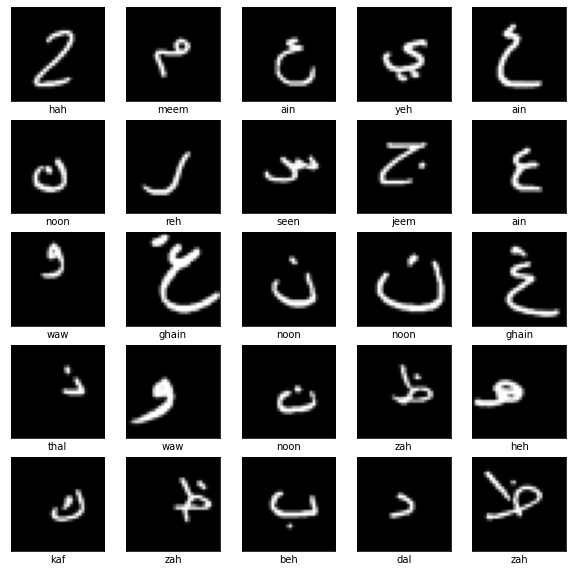

In [ ]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])])
plt.show()

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape, y_test.shape)
for i in zip(y_train[0], arabic_characters):
    print(i)

(13440, 28) (3360, 28)
(1.0, 'alef')
(0.0, 'beh')
(0.0, 'teh')
(0.0, 'theh')
(0.0, 'jeem')
(0.0, 'hah')
(0.0, 'khah')
(0.0, 'dal')
(0.0, 'thal')
(0.0, 'reh')
(0.0, 'zain')
(0.0, 'seen')
(0.0, 'sheen')
(0.0, 'sad')
(0.0, 'dad')
(0.0, 'tah')
(0.0, 'zah')
(0.0, 'ain')
(0.0, 'ghain')
(0.0, 'feh')
(0.0, 'qaf')
(0.0, 'kaf')
(0.0, 'lam')
(0.0, 'meem')
(0.0, 'noon')
(0.0, 'heh')
(0.0, 'waw')
(0.0, 'yeh')


In [ ]:
len(y_test)

3360

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same',input_shape=shape)) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization()) 

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(BatchNormalization())
model.add(Dropout(0.35)) #64 --> 42

model.add(Conv2D(64, (3, 3), padding='same')) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(512)) 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(28)) 
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        640       
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 30, 30, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                      

In [ ]:
model.compile(optimizer = 'adam',
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False, 
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=10, 
        zoom_range = 0.2,
        width_shift_range=0.2, 
        height_shift_range=0.2, 
        horizontal_flip=False,  
        vertical_flip=False) 
train_gen = datagen.flow(x_train, y_train, batch_size=20)
test_gen = datagen.flow(x_test, y_test, batch_size=20)

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("cnn.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit_generator(train_gen, epochs = 100, validation_data = test_gen, 
                            callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/100


<ipython-input-23-e50c8ebef984>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs = 100, validation_data = test_gen,


672/672 [==============================] - ETA: 0s - loss: 2.2387 - accuracy: 0.3560
Epoch 1: val_accuracy improved from -inf to 0.52649, saving model to cnn.h5
672/672 [==============================] - 149s 220ms/step - loss: 2.2387 - accuracy: 0.3560 - val_loss: 1.4478 - val_accuracy: 0.5265 - lr: 0.0010
Epoch 2/100
672/672 [==============================] - ETA: 0s - loss: 1.0568 - accuracy: 0.6557
Epoch 2: val_accuracy improved from 0.52649 to 0.75744, saving model to cnn.h5
672/672 [==============================] - 149s 222ms/step - loss: 1.0568 - accuracy: 0.6557 - val_loss: 0.7645 - val_accuracy: 0.7574 - lr: 0.0010
Epoch 3/100
672/672 [==============================] - ETA: 0s - loss: 0.7526 - accuracy: 0.7581
Epoch 3: val_accuracy did not improve from 0.75744
672/672 [==============================] - 147s 219ms/step - loss: 0.7526 - accuracy: 0.7581 - val_loss: 1.3608 - val_accuracy: 0.6027 - lr: 0.0010
Epoch 4/100
672/672 [==============================] - ETA: 0s - loss: 

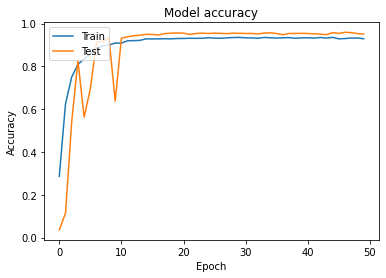

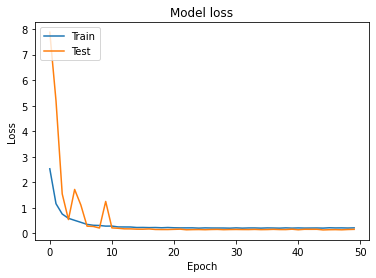

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test accuarcy: %0.2f%%' % (score[0] * 100))

105/105 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.9768
Test accuarcy: 9.35%


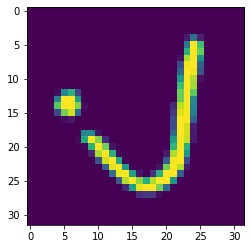

In [ ]:
plt.imshow(x_test[20])
plt.show()

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.99      0.99      0.99       120
           2       0.94      0.98      0.96       120
           3       0.99      0.97      0.98       120
           4       0.98      1.00      0.99       120
           5       0.99      0.98      0.99       120
           6       0.99      0.99      0.99       120
           7       0.97      0.96      0.97       120
           8       0.95      0.93      0.94       120
           9       0.95      0.99      0.97       120
          10       0.96      0.92      0.94       120
          11       1.00      0.97      0.99       120
          12       0.98      1.00      0.99       120
          13       0.94      1.00      0.97       120
          14       0.98      0.97      0.97       120
          15       0.96      0.96      0.96       120
          16       0.96      0.96      0.96       120
          17       0.98    

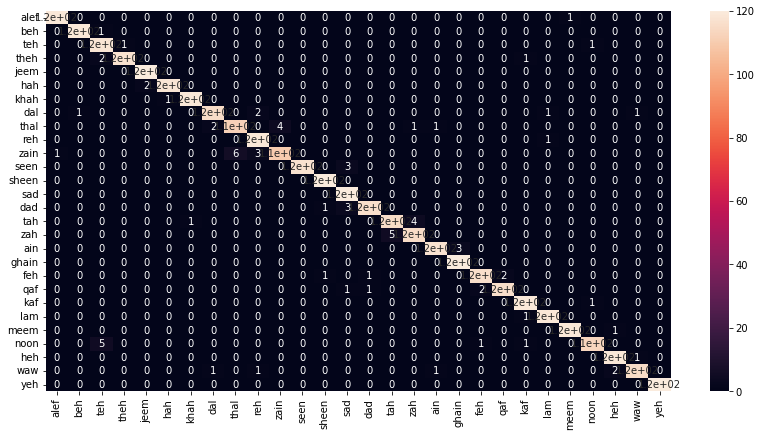

In [ ]:
from sklearn.metrics import confusion_matrix

fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=arabic_characters,yticklabels=arabic_characters,annot=True)


plt.show()